In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df_train = pd.read_csv('drive/MyDrive/MagolegoDS2022/ha2_train.csv')
df_test = pd.read_csv('drive/MyDrive/MagolegoDS2022/ha2_test.csv')
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251396 entries, 0 to 251395
Data columns (total 28 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   channelGrouping                           251396 non-null  object 
 1   visitNumber                               251396 non-null  int64  
 2   device.browser                            251396 non-null  object 
 3   device.operatingSystem                    251396 non-null  object 
 4   device.isMobile                           251396 non-null  int64  
 5   device.deviceCategory                     251396 non-null  object 
 6   geoNetwork.continent                      251396 non-null  object 
 7   geoNetwork.subContinent                   251396 non-null  object 
 8   geoNetwork.country                        251396 non-null  object 
 9   geoNetwork.city                           251396 non-null  object 
 10  totals.hits         

In [ ]:
# Encode rare categories (less than 1000 occurrences) in categorical features with the value “Other”. 
# How many columns requires such imputation? (single integer number)

#get list of obj columns
obj_l = df_train.select_dtypes(include = "object").columns.tolist() 
# Inserting value "other" into the TRAIN data
# For-loops: 1) for each object-type column in the data count the quantity of each category inside each of them 
# 2) replace strings to "other" if they are in the list from the previous step with less than 1000 occurences
for cat in df_train[obj_l]:
   for count_v in df_train[cat].value_counts():
      if count_v < 1000:
         df_train = df_train.replace(df_train[cat].value_counts()[df_train[cat].value_counts() == count_v].index, "Other")

In [ ]:
# same "other"-isnerting-loop for test data
for cat in df_test[obj_l]:
   for count_v in df_test[cat].value_counts():
      if count_v < 1000:
         df_test = df_test.replace(df_test[cat].value_counts()[df_test[cat].value_counts() == count_v].index, "Other")

In [ ]:
i = 0
for x in df_train[obj_l]:
  i = i+1
  print(i, "Other" in df_train[x].values) #"Other" value was input into 10 columns

1 True
2 True
3 True
4 False
5 True
6 True
7 True
8 True
9 True
10 True
11 True
12 False


In [ ]:
#What is the median value of totals.totalTransactionRevenue?
df_train["totals.totalTransactionRevenue"].median()

0.0

(array([2.879e+03, 6.000e+00, 6.000e+00, 2.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([2.50000e+06, 1.78820e+09, 3.57390e+09, 5.35960e+09, 7.14530e+09,
        8.93100e+09, 1.07167e+10, 1.25024e+10, 1.42881e+10, 1.60738e+10,
        1.78595e+10]),
 <a list of 10 Patch objects>)

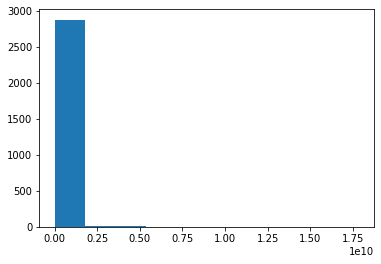

In [ ]:
#Build a histogram of successful (non-zero) transactions, what is their median value in dollars?
plt.hist(df_train[df_train["totals.totalTransactionRevenue"] != 0]["totals.totalTransactionRevenue"])

In [ ]:
df_train[df_train["totals.totalTransactionRevenue"] != 0]["totals.totalTransactionRevenue"].median()

53975000.0

In [ ]:
df_train["totals.totalTransactionRevenue"].agg(['mean', 'max','median'])

mean      1.758614e+06
max       1.785950e+10
median    0.000000e+00
Name: totals.totalTransactionRevenue, dtype: float64

In [ ]:
# Analyze totals.totalTransactionRevenue with respect to categorical features. For channelGrouping what is its most frequent value?
df_train.channelGrouping.mode()

0    Organic Search
dtype: object

In [5]:
#What is channelGrouping with the highest sum of totals.totalTransactionRevenue
df_train.groupby('channelGrouping')['totals.totalTransactionRevenue'].agg(['sum']).sort_values(by='sum',ascending=False)

,sum
channelGrouping,
Referral,1.698390e+11
Direct,1.364877e+11
Organic Search,1.013594e+11
Display,1.796692e+10
Paid Search,1.305409e+10
Social,3.188260e+09
Affiliates,2.131900e+08
(Other),0.000000e+00


In [ ]:
#What is the month with the highest mean of totals.totalTransactionRevenue?
df_train.groupby('month')['totals.totalTransactionRevenue'].agg(['mean']).sort_values(by='mean',ascending=False)

,mean
month,
6,3.024198e+06
8,2.673355e+06
2,2.259118e+06
5,2.163146e+06
9,2.056668e+06
4,1.701545e+06
12,1.685706e+06
7,1.624228e+06
1,1.623036e+06


In [ ]:
#For which device.browser the largest mean totals.totalTransactionRevenue is achieved?
df_train.groupby('device.browser')['totals.totalTransactionRevenue'].agg(['mean']).sort_values(by='mean',ascending=False)

,mean
device.browser,
Firefox,6.132851e+06
Chrome,2.111971e+06
Edge,6.712960e+05
Safari,3.304650e+05
Internet Explorer,2.652093e+05
Opera,2.259206e+04
Safari (in-app),8.473054e+03
Android Webview,0.000000e+00
Opera Mini,0.000000e+00


In [ ]:
#Build a line chart of sums of totals.totalTransactionRevenue depending on visitHour. 
#What is the peak sales hour? (integer number from 0 to 23). Hint: use groupby.
df_train.groupby('visitHour')['totals.totalTransactionRevenue'].agg(['sum']).sort_values(by='sum',ascending=False)['sum']

visitHour
18    5.466490e+10
21    4.828034e+10
22    3.243731e+10
0     3.184274e+10
16    3.163428e+10
20    2.999095e+10
1     2.894093e+10
19    2.699951e+10
23    2.608865e+10
2     2.480300e+10
17    1.616492e+10
3     1.363446e+10
4     1.207722e+10
7     1.198399e+10
5     1.187744e+10
6     9.965900e+09
8     7.432590e+09
15    7.346250e+09
11    4.695430e+09
10    4.420730e+09
9     2.602730e+09
12    2.137330e+09
13    1.113530e+09
14    9.734800e+08
Name: sum, dtype: float64

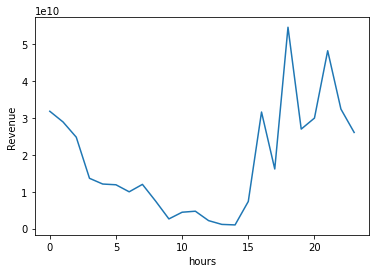

In [ ]:
plt.plot(df_train.groupby('visitHour')['totals.totalTransactionRevenue'].agg(['sum']))
plt.ylabel('Revenue')
plt.xlabel('hours');

## **Model Training**

In [ ]:
# Prepare totals.totalTransactionRevenue for model training. 
#Create a new column log_totals.totalTransactionRevenue = log(1+totals.totalTransactionRevenue). Drop column totals.totalTransactionRevenue.

df_train['log_totals.totalTransactionRevenue'] = np.log1p(df_train["totals.totalTransactionRevenue"])
df_train = df_train.drop(['totals.totalTransactionRevenue'], axis = 1)
df_test['log_totals.totalTransactionRevenue'] = np.log1p(df_test["totals.totalTransactionRevenue"])
df_test = df_test.drop(['totals.totalTransactionRevenue'], axis = 1)
#What is the mean value of the log_totals.totalTransactionRevenue column?
df_train['log_totals.totalTransactionRevenue'].mean()

0.20700909346007737

In [ ]:
#Train a Catboost regression model to predict log_totals.totalTransactionRevenue. 
# What is your test score in terms of MAE? (float number with 3 significant digits, e.g. 12.345) Do not forget to apply all necessary preprocessing to a test part of the data.

In [ ]:
#!pip install catboost

In [ ]:
from catboost import Pool, CatBoostRegressor
# some CatBoost tutorial https://colab.research.google.com/github/catboost/tutorials/blob/master/model_analysis/object_importance_tutorial.ipynb

In [ ]:
model = CatBoostRegressor()

In [ ]:
#Create pools
train_labels = df_train['log_totals.totalTransactionRevenue']
train_data = df_train.drop(['log_totals.totalTransactionRevenue'], axis = 1)

test_labels = df_test['log_totals.totalTransactionRevenue']
test_data = df_test.drop(['log_totals.totalTransactionRevenue'], axis = 1)

train_pool = Pool(train_data, train_labels, cat_features = obj_l)
test_pool = Pool(test_data, test_labels, cat_features = obj_l)

print('Train dataset shape: {}\n'.format(train_pool.shape))

Train dataset shape: (251396, 27)



In [ ]:
model.fit(train_pool) # fit the training pool to the model

Learning rate set to 0.098047
0:	learn: 1.8747108	total: 814ms	remaining: 13m 33s
1:	learn: 1.8353652	total: 1.56s	remaining: 13m
2:	learn: 1.8027074	total: 2.17s	remaining: 12m 2s
3:	learn: 1.7749312	total: 2.81s	remaining: 11m 40s
4:	learn: 1.7513828	total: 3.54s	remaining: 11m 45s
5:	learn: 1.7310606	total: 4.17s	remaining: 11m 30s
6:	learn: 1.7141994	total: 4.73s	remaining: 11m 11s
7:	learn: 1.6997513	total: 5.34s	remaining: 11m 2s
8:	learn: 1.6878192	total: 5.97s	remaining: 10m 57s
9:	learn: 1.6780016	total: 6.53s	remaining: 10m 46s
10:	learn: 1.6683550	total: 7.1s	remaining: 10m 38s
11:	learn: 1.6603875	total: 7.62s	remaining: 10m 27s
12:	learn: 1.6536037	total: 8.13s	remaining: 10m 17s
13:	learn: 1.6476373	total: 8.69s	remaining: 10m 12s
14:	learn: 1.6425876	total: 9.31s	remaining: 10m 11s
15:	learn: 1.6370291	total: 9.93s	remaining: 10m 10s
16:	learn: 1.6319137	total: 10.6s	remaining: 10m 13s
17:	learn: 1.6277697	total: 11.2s	remaining: 10m 10s
18:	learn: 1.6240154	total: 11.8s

In [ ]:
preds = model.predict(test_pool)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
#Train a Catboost regression model to predict log_totals.totalTransactionRevenue. What is your test score in terms of MAE? 
mean_absolute_error(y_true = df_test['log_totals.totalTransactionRevenue'], y_pred = preds)

0.31087068728844314

In [ ]:
#Check feature importances of a Catboost model, what are the top4 most important features?
#model.get_object_importance(test_pool, train_pool, top_size=4) #get_object_importance didn't work for me for some reason # says that overfill the storage 

In [ ]:
#Alternative way to check importance of features (?)
importances = pd.DataFrame({"imp": model.feature_importances_, "col": model.feature_names_})
importances = importances.sort_values(['imp'], ascending=False).head(4)
importances

,imp,col
11,24.400438,totals.pageviews
10,12.903086,totals.hits
14,11.674301,totals.sessionQualityDim
12,8.496860,totals.timeOnSite


In [ ]:
#Analyze the result, how does this error (MAE) translates to real money (use exp1m and transform the result to dollars)?
np.expm1(0.31087068728844314)

0.36461274800162513

In [ ]:
mean_squared_error(y_true = df_test['log_totals.totalTransactionRevenue'], y_pred = preds)

2.443785705796889